<a href="https://colab.research.google.com/github/GerardoFesta/3DFER_SE4AI/blob/main/3DTransformation/MeshConnectivityExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

In [3]:
import plotly.express as px
import cv2
import mediapipe as mp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linspace
from mpl_toolkits import mplot3d
import glob, os
import json
import pandas as pd
import math

In [4]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import zipfile


zip_ref = zipfile.ZipFile('/content/drive/Shareddrives/Datasets SEFAI/fer2013.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall() #Extracts the files into the /tmp folder
zip_ref.close()

In [6]:
mp_face_mesh = mp.solutions.face_mesh

contour_list = [landmark_tuple for landmark_tuple in mp_face_mesh.FACEMESH_CONTOURS]
tass_list = [landmark_tuple for landmark_tuple in mp_face_mesh.FACEMESH_TESSELATION]
irises_list = [landmark_tuple for landmark_tuple in mp_face_mesh.FACEMESH_IRISES]
all_links_list = list(set(contour_list) | set(tass_list) | set(irises_list))
all_links_array = np.array(all_links_list)


vertices = set(range(477))

# Crea le facce
faces = []
for v1, v2 in all_links_array:
    for v3, v4 in all_links_array:
        if v2 == v3:
            faces.append((v1, v2, v4))

np.save('landmark_links.npy', all_links_array)
np.save('mesh_faces.npy', np.array(faces))





# Mesh Example

In [22]:
import zipfile


zip_ref = zipfile.ZipFile('/content/drive/Shareddrives/Datasets SEFAI/fer2013.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall() #Extracts the files into the /tmp folder
zip_ref.close()

Pytorch3D import

In [ ]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith(("1.13.", "2.0.")) and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

In [23]:
import torch
from pytorch3d.structures import Meshes
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow
import cv2

In [9]:


def plot_mesh(mesh):
    verts = landmark_matrix.squeeze(0)
    faces = faces_tensor.squeeze(0)

    x = verts[:, 0]
    y = verts[:, 1]
    z = verts[:, 2]

    # Crea il tracciamento dei vertici
    vertices_trace = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=4,
            color='black'
        ),
        name='Vertices'
    )

    # Crea il tracciamento dei triangoli
    triangles_trace = go.Mesh3d(
        x=x,
        y=y,
        z=z,
        i=faces[:, 0],
        j=faces[:, 1],
        k=faces[:, 2],
        color='blue',
        name='Triangles'
    )

    # Crea la figura e aggiungi i tracciamenti
    fig = go.Figure(data=[vertices_trace, triangles_trace])

    # Imposta la visualizzazione della figura
    fig.update_layout(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        ),
        scene_aspectmode='manual',
        scene_aspectratio=dict(x=1, y=1, z=1),
        width=700,
        margin=dict(r=0, l=0, b=0, t=0)
    )

    # Visualizza il grafico
    fig.show()



In [10]:
test_df = pd.read_csv("/content/drive/Shareddrives/Datasets SEFAI/test_set.csv")

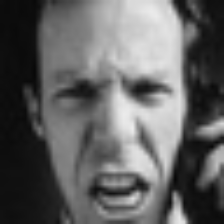

In [28]:
landmark_matrix = eval(test_df.iloc[24]['landmarks']) #change the number as you want if you would like to see other images
faces_tensor = torch.tensor(faces, dtype=torch.float32)
faces_tensor = faces_tensor.unsqueeze(0)

landmark_matrix = torch.tensor(landmark_matrix, dtype=torch.float32).unsqueeze(0)

meshes = Meshes(verts=landmark_matrix, faces = faces_tensor)
path = "/content/"+test_df.iloc[24]['nome']
original_image = cv2.imread(path)

cv2_imshow(cv2.resize(original_image,(224,224)))
plot_mesh(meshes)